<a href="https://colab.research.google.com/github/K2022682/CNN/blob/main/NetflixShows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Step 1: Install & import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset (upload manually or use path)
from google.colab import files
uploaded = files.upload()  # upload your 'netflix_titles.csv'

# Read data
df = pd.read_csv("Netflix Shows.csv",encoding="latin-1")
df.head()


Saving Netflix Shows.csv to Netflix Shows (2).csv


,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [20]:
df.columns


Index(['title', 'rating', 'ratingLevel', 'ratingDescription', 'release year',
       'user rating score', 'user rating size'],
      dtype='object')

Data Cleaning


In [21]:
# Drop duplicates
df = df.drop_duplicates()

# Check missing values
print(df.isnull().sum())

# Fill missing numeric values with mean
df['user rating score'] = df['user rating score'].fillna(df['user rating score'].mean())

# Fill missing categorical values with 'Unknown'
df['rating'] = df['rating'].fillna('Unknown')
df['ratingLevel'] = df['ratingLevel'].fillna('Unknown')
df['ratingDescription'] = df['ratingDescription'].fillna('Unknown')

# Standardize column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

df.head()


title                  0
rating                 0
ratingLevel           33
ratingDescription      0
release year           0
user rating score    244
user rating size       0
dtype: int64


,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.000000,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,81.398438,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.000000,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.000000,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.000000,80


EDA and Strorytelling


Distribution of Ratings

/tmp/ipython-input-458627582.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette="Set2")


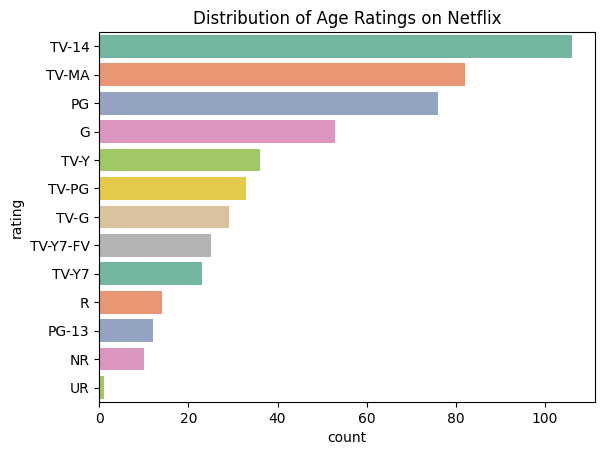

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette="Set2")
plt.title("Distribution of Age Ratings on Netflix")
plt.show()


Content Over Time


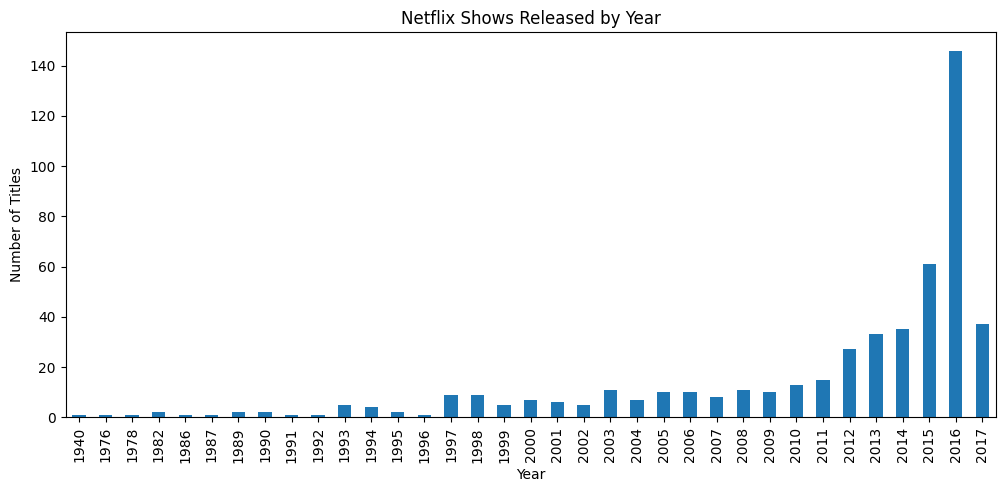

In [23]:
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title("Netflix Shows Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


User Rating Scores

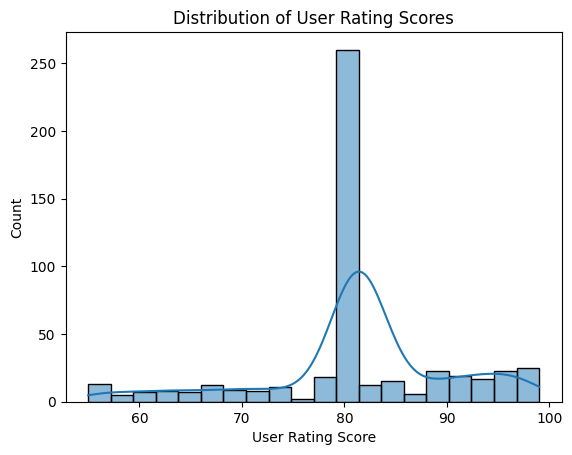

In [24]:
sns.histplot(df['user_rating_score'], bins=20, kde=True)
plt.title("Distribution of User Rating Scores")
plt.xlabel("User Rating Score")
plt.ylabel("Count")
plt.show()


Popular Shows by User Rating Size

In [25]:
top_shows = df[['title', 'user_rating_size']].sort_values(by='user_rating_size', ascending=False).head(10)
print(top_shows)


                                                 title  user_rating_size
998                                        Beary Tales                82
997                                   Precious Puppies                82
1                                  Lucky Number Slevin                82
958                                 Air Bud: World Pup                82
951                                          Mr. Magoo                82
945                                         Yellowbird                82
942                                          Underdogs                82
939  Disney Animation Collection: Vol. 2: Three Lit...                82
930                                 Kronk's New Groove                82
929                             Pooh's Heffalump Movie                82


Cross-analysis: Rating vs User Score

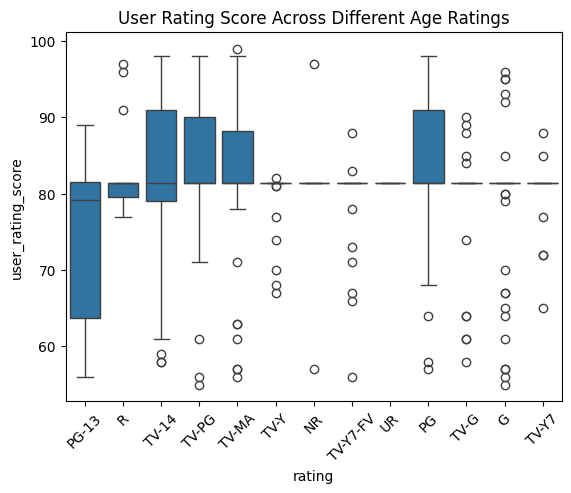

In [26]:
sns.boxplot(x='rating', y='user_rating_score', data=df)
plt.title("User Rating Score Across Different Age Ratings")
plt.xticks(rotation=45)
plt.show()


StoryTelling

Netflix shows cater to all audiences, but the majority fall under TV-MA (mature) and TV-14, reflecting its focus on teen and adult content.
A surge in releases happened after 2010, aligning with Netflix’s global expansion.
User ratings are generally skewed high, with most shows scoring above 70, but rating sizes reveal only a handful of titles dominate user attention.
For example, Breaking Bad and Stranger Things appear among the most-rated titles, showing Netflix’s reliance on blockbuster series.